## read or process policyholder data [Caio]


In [1]:
#------------------------Packages----------------------

import numpy as np
import pandas as pd
import random
import datetime
from tqdm.notebook import tqdm

#-----------------------Import Data--------------------

inpatient_claim=pd.read_csv('Inpatient_claim.csv')
bene_file=pd.read_csv('bene_file.csv')
bene_file.drop_duplicates(['DESYNPUF_ID'],keep='last',inplace=True,ignore_index=True)

#---------------Claim Aggregation Functions------------

def no_of_claims(cust_list):
    
    claim_dict={}
    
    for cust in tqdm(cust_list,desc='no_of_claims'):
        
        claim_dict[cust]=inpatient_claim[inpatient_claim['DESYNPUF_ID']==cust]['DESYNPUF_ID'].count()
        
    return list(claim_dict.values())

def total_claimed(cust_list):
        
    claim_dict={}
    
    for cust in tqdm(cust_list,desc='total_claimed'):
        
        claim_dict[cust]=inpatient_claim[inpatient_claim['DESYNPUF_ID']==cust]['CLM_PMT_AMT'].sum()
        
    return list(claim_dict.values())

#------------Policyholder Dataframe Function-----------

def health_df(inpatient_claim=inpatient_claim,bene_file=bene_file,add_cols=[no_of_claims,total_claimed]):
    
    health_df=bene_file.copy()
    cust_list=list(health_df['DESYNPUF_ID'])
    
    for col in add_cols:
        health_df[col.__name__]=col(cust_list)
        
    health_df['claimed']=(health_df['no_of_claims']>0).astype('int')
    
    for col in health_df.columns:
        if health_df[col].isin([2,1]).min()==True:
            health_df[col].replace(2,0)
    
    return health_df

In [2]:
def get_policyholder_data(loc='policyholder_data.csv',generate=False):
    if generate==False:
        data=pd.read_csv('policyholder_data.csv')
    else:
        data=health_df()
    return data
#------------------------get data----------------------
data=get_policyholder_data(generate=True)

## data exploration and visualisation [Moris/Michel]

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data

,DESYNPUF_ID,BENE_SEX_IDENT_CD,BENE_RACE_CD,SP_STATE_CODE,BENE_COUNTY_CD,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,Total_mons,no_of_claims,total_claimed,claimed
0,77610BE4C99F2C74,2,1,17,330,2,2,2,2,2,2,2,2,2,2,2,48,0,0.0,0
1,77685B3CF649A40E,1,1,10,120,2,2,2,2,2,2,2,2,2,2,2,0,0,0.0,0
2,7785B265BC0A7936,1,1,6,500,2,2,2,2,2,2,2,2,2,2,2,0,0,0.0,0
3,77872CACD89A9767,1,1,16,850,2,2,2,2,2,2,2,2,2,2,2,24,0,0.0,0
4,7795D2A2AC9DCA92,2,1,3,100,2,2,2,2,2,2,2,2,2,2,2,24,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60400,7754580CECFCE7DD,2,1,45,620,2,1,2,2,1,2,1,1,1,1,2,24,6,46000.0,1
60401,77548DF958DEE8E5,1,1,45,610,2,2,2,2,1,2,1,2,1,1,2,48,1,8000.0,1
60402,77561448B15C6369,2,1,18,70,2,2,2,2,2,2,1,1,2,2,2,48,0,0.0,0
60403,7758D2D4F5C1803A,1,1,29,20,2,2,2,2,2,2,1,1,2,2,2,24,0,0.0,0


In [5]:
data.to_csv(r'C:\Users\shashank.INTRAD\Desktop\Datasets\Insurance Claim Research - Mithra Sir\data.csv', index = False)

In [6]:
data.shape

(60405, 20)

In [7]:
data['BENE_SEX_IDENT_CD'].unique()

array([2, 1], dtype=int64)

In [8]:
for column in data.columns[1:-2]:
    print(column, data[column].unique() )

BENE_SEX_IDENT_CD [2 1]
BENE_RACE_CD [1 2 3 5]
SP_STATE_CODE [17 10  6 16  3 39 46 24 31 15  7 26 32 51  1 34  5 22 33  4 21 38 54 18
 53 36 44 37 45 13 50 30 23 52 11  2 49 19 42 12 14 41 35 25 29  9 47 43
 28 20 27  8]
BENE_COUNTY_CD [330 120 500 850 100  50 460 220 230 130 490  10 940 250 210 150 280 620
 700 310 830  60  20 590 510 560 160   0 580  90 200 140 400 180 610 820
 650 953 340 390  80 410 450  70 360 320 640 420 240 690 380 480 370 810
 260 660 190 470 290 720 910 170 570  40 411 350 270 730 520 530 550 755
 999 900 954 430 540 141 750  30 331 440 110 780 960 972 670 600 930 963
 986 800 861  55 630 961 680 622 710 740 890 840 882 770 892 980 562 888
 860 989 790 760  25 312 300 879 421 921 970 653 801 992 222 950 791 880
 771 990 841 883 462 943 982 951 381 811 851 291 948 947 795 591 974 994
 885 884 920 843 564 870 711 903 131 241 251 751 871 451 901 111 441 722
 511 194  11 552 991 461 191 975 946 831 601 561 641 702 321 521 902 978
 932 981   1 734 471 875 761 288 8

<AxesSubplot:xlabel='SP_DIABETES', ylabel='count'>

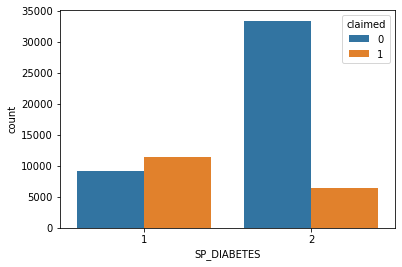

In [9]:
sns.countplot(x='SP_DIABETES',data=data,hue='claimed')

<AxesSubplot:xlabel='SP_DEPRESSN', ylabel='count'>

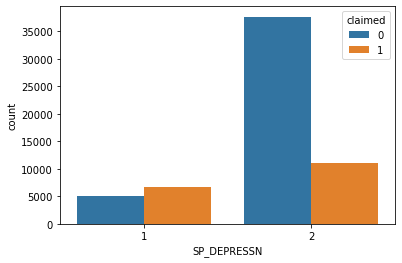

In [10]:
sns.countplot(x='SP_DEPRESSN',data=data,hue='claimed')

<AxesSubplot:xlabel='claimed', ylabel='count'>

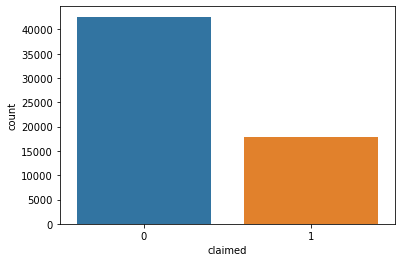

In [11]:
sns.countplot(x='claimed',data=data)

<AxesSubplot:xlabel='SP_DEPRESSN', ylabel='count'>

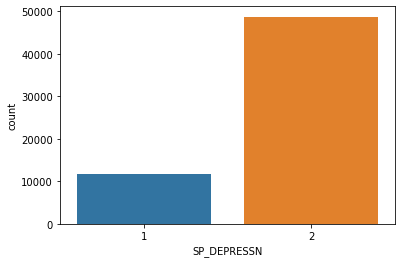

In [12]:
sns.countplot(x='SP_DEPRESSN',data=data)

<AxesSubplot:xlabel='SP_ISCHMCHT', ylabel='count'>

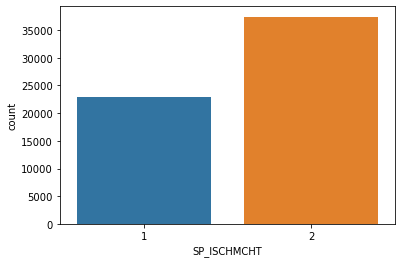

In [13]:
sns.countplot(x='SP_ISCHMCHT',data=data)

<AxesSubplot:xlabel='SP_CNCR', ylabel='count'>

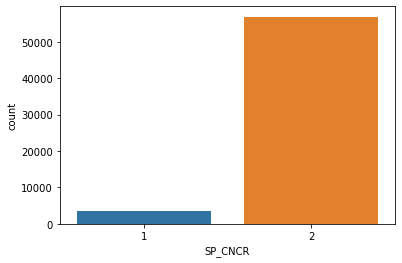

In [14]:
sns.countplot(x='SP_CNCR',data=data)

<AxesSubplot:xlabel='no_of_claims', ylabel='count'>

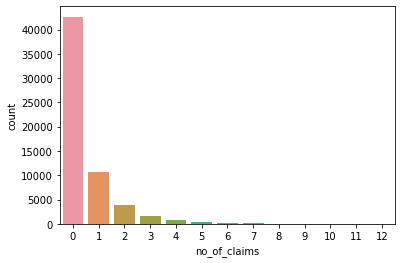

In [15]:
sns.countplot(x='no_of_claims',data=data)

<AxesSubplot:xlabel='no_of_claims', ylabel='count'>

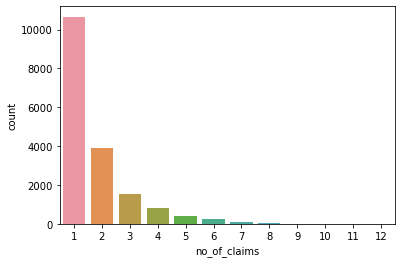

In [16]:
sns.countplot(x='no_of_claims',data=data[data['no_of_claims']!=0])

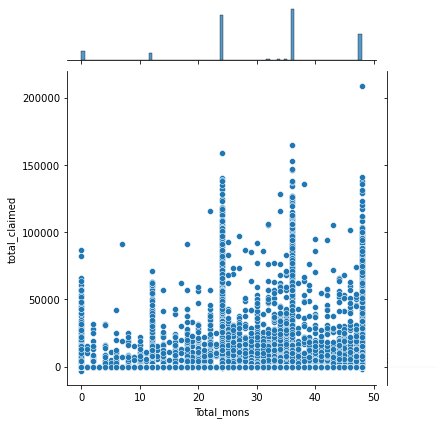

In [17]:
sns.jointplot(x='Total_mons',y='total_claimed',data=data)

Text(0.5, 1.0, 'data.corr()')

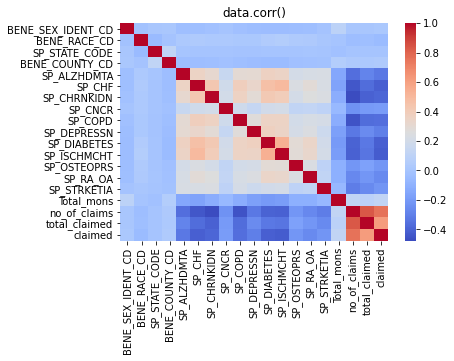

In [18]:
sns.heatmap(data.corr(),cmap='coolwarm')
plt.title('data.corr()')

E:\Softwares\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_claimed', ylabel='Density'>

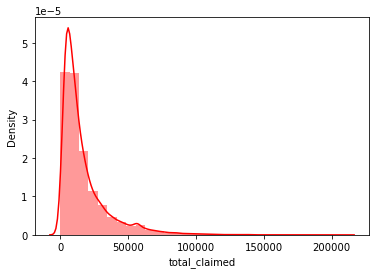

In [19]:
sns.distplot(data[data['total_claimed']>0]['total_claimed'],kde = True, color ='red', bins = 30)

In [20]:
data['total_claimed'].describe()

count     60405.000000
mean       4947.072428
std       12336.249713
min       -3000.000000
25%           0.000000
50%           0.000000
75%        4000.000000
max      209000.000000
Name: total_claimed, dtype: float64

In [21]:
data_negative=data[data['total_claimed']<0]

In [22]:
data_negative.shape

(10, 20)

In [23]:
data_negative['total_claimed'].value_counts()

-100.0     2
-300.0     2
-1000.0    1
-200.0     1
-3000.0    1
-20.0      1
-30.0      1
-2000.0    1
Name: total_claimed, dtype: int64

In [24]:
data_positive=data_negative=data[data['total_claimed']>0]

In [25]:
data_positive['total_claimed'].describe()

count     17447.000000
mean      17128.157276
std       17839.711783
min          10.000000
25%        6000.000000
50%       11000.000000
75%       21000.000000
max      209000.000000
Name: total_claimed, dtype: float64

In [26]:
data['illness_score']=data[['SP_ALZHDMTA','SP_CHF','SP_CHRNKIDN','SP_CNCR','SP_COPD','SP_DEPRESSN',
'SP_DIABETES','SP_ISCHMCHT','SP_OSTEOPRS','SP_RA_OA','SP_STRKETIA']].sum(axis=1)

In [27]:
data['illness_score']

0        22
1        22
2        22
3        22
4        22
         ..
60400    16
60401    18
60402    20
60403    20
60404    20
Name: illness_score, Length: 60405, dtype: int64

E:\Softwares\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='illness_score', ylabel='Density'>

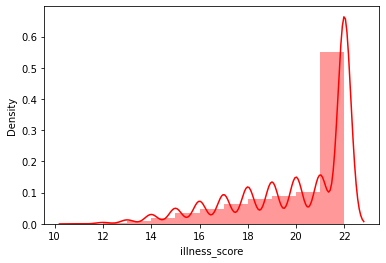

In [28]:
sns.distplot(data['illness_score'],kde = True, color ='red', bins = 11)

BENE_SEX_IDENT_CD    0.020977
BENE_RACE_CD        -0.047758
SP_STATE_CODE       -0.000597
BENE_COUNTY_CD       0.038533
SP_ALZHDMTA         -0.321615
SP_CHF              -0.410563
SP_CHRNKIDN         -0.385081
SP_CNCR             -0.191560
SP_COPD             -0.357421
SP_DEPRESSN         -0.299728
SP_DIABETES         -0.409051
SP_ISCHMCHT         -0.422900
SP_OSTEOPRS         -0.213821
SP_RA_OA            -0.258315
SP_STRKETIA         -0.221464
Total_mons           0.123312
no_of_claims         0.758193
total_claimed        0.620771
claimed              1.000000
illness_score       -0.548158
Name: claimed, dtype: float64

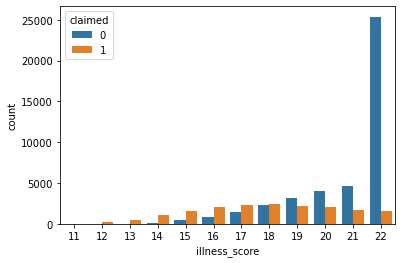

In [29]:
sns.countplot(x='illness_score',data=data,hue='claimed')
data.corr()['claimed']

Text(0.5, 1.0, 'data.corr()')

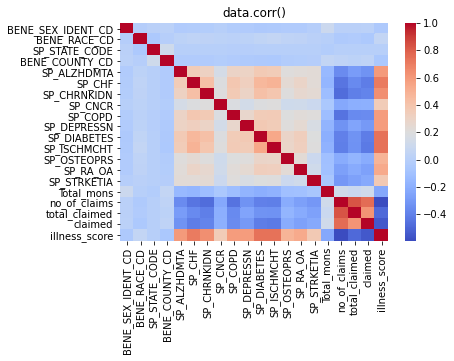

In [30]:
sns.heatmap(data.corr(),cmap='coolwarm')
plt.title('data.corr()')

In [31]:
#do sublots of all charts
#Check plotly
#check which disease has highest claims
#Add weight to ilness score

## regression models [Gnana]

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60405 entries, 0 to 60404
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DESYNPUF_ID        60405 non-null  object 
 1   BENE_SEX_IDENT_CD  60405 non-null  int64  
 2   BENE_RACE_CD       60405 non-null  int64  
 3   SP_STATE_CODE      60405 non-null  int64  
 4   BENE_COUNTY_CD     60405 non-null  int64  
 5   SP_ALZHDMTA        60405 non-null  int64  
 6   SP_CHF             60405 non-null  int64  
 7   SP_CHRNKIDN        60405 non-null  int64  
 8   SP_CNCR            60405 non-null  int64  
 9   SP_COPD            60405 non-null  int64  
 10  SP_DEPRESSN        60405 non-null  int64  
 11  SP_DIABETES        60405 non-null  int64  
 12  SP_ISCHMCHT        60405 non-null  int64  
 13  SP_OSTEOPRS        60405 non-null  int64  
 14  SP_RA_OA           60405 non-null  int64  
 15  SP_STRKETIA        60405 non-null  int64  
 16  Total_mons         604

In [33]:
df=data

In [34]:
df.BENE_SEX_IDENT_CD.value_counts()

2    33006
1    27399
Name: BENE_SEX_IDENT_CD, dtype: int64

In [35]:
df1 = df.drop(['DESYNPUF_ID','BENE_RACE_CD','SP_STATE_CODE','BENE_COUNTY_CD'], axis=1)

In [36]:
df1

,BENE_SEX_IDENT_CD,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,Total_mons,no_of_claims,total_claimed,claimed,illness_score
0,2,2,2,2,2,2,2,2,2,2,2,2,48,0,0.0,0,22
1,1,2,2,2,2,2,2,2,2,2,2,2,0,0,0.0,0,22
2,1,2,2,2,2,2,2,2,2,2,2,2,0,0,0.0,0,22
3,1,2,2,2,2,2,2,2,2,2,2,2,24,0,0.0,0,22
4,2,2,2,2,2,2,2,2,2,2,2,2,24,0,0.0,0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60400,2,2,1,2,2,1,2,1,1,1,1,2,24,6,46000.0,1,16
60401,1,2,2,2,2,1,2,1,2,1,1,2,48,1,8000.0,1,18
60402,2,2,2,2,2,2,2,1,1,2,2,2,48,0,0.0,0,20
60403,1,2,2,2,2,2,2,1,1,2,2,2,24,0,0.0,0,20


In [37]:
df1.columns

Index(['BENE_SEX_IDENT_CD', 'SP_ALZHDMTA', 'SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR',
       'SP_COPD', 'SP_DEPRESSN', 'SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS',
       'SP_RA_OA', 'SP_STRKETIA', 'Total_mons', 'no_of_claims',
       'total_claimed', 'claimed', 'illness_score'],
      dtype='object')

In [38]:
df1 = df1.drop(['total_claimed','no_of_claims','illness_score'] ,axis=1)

In [39]:
varlist =  ['BENE_SEX_IDENT_CD', 'SP_ALZHDMTA', 'SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR', 'SP_COPD','SP_DEPRESSN', 'SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS', 'SP_RA_OA',
       'SP_STRKETIA']

def binary_map(x):
    return x.map({ 1: 0, 2: 1})
df1[varlist] = df1[varlist].apply(binary_map)

In [40]:
#Checking the character value counts for all columns
for c in df1:
    print(df1[c].astype('category').value_counts())
    print('\n\n=======================================================\n\n')

1    33006
0    27399
Name: BENE_SEX_IDENT_CD, dtype: int64




1    49820
0    10585
Name: SP_ALZHDMTA, dtype: int64




1    44852
0    15553
Name: SP_CHF, dtype: int64




1    51695
0     8710
Name: SP_CHRNKIDN, dtype: int64




1    56874
0     3531
Name: SP_CNCR, dtype: int64




1    52960
0     7445
Name: SP_COPD, dtype: int64




1    48703
0    11702
Name: SP_DEPRESSN, dtype: int64




1    39781
0    20624
Name: SP_DIABETES, dtype: int64




1    37402
0    23003
Name: SP_ISCHMCHT, dtype: int64




1    50805
0     9600
Name: SP_OSTEOPRS, dtype: int64




1    51991
0     8414
Name: SP_RA_OA, dtype: int64




1    58010
0     2395
Name: SP_STRKETIA, dtype: int64




36    19473
24    17018
48     9883
0      3727
12     2961
34      475
35      428
32      381
30      323
46      290
18      287
22      282
33      262
42      253
20      251
44      246
14      242
26      235
28      228
16      228
2       187
40      176
10      173
31      170
6       169
27      156
29

### Train-Test Split

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
# Putting feature variable to X
X = df1.drop('claimed', axis=1)
X.head()

,BENE_SEX_IDENT_CD,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,Total_mons
0,1,1,1,1,1,1,1,1,1,1,1,1,48
1,0,1,1,1,1,1,1,1,1,1,1,1,0
2,0,1,1,1,1,1,1,1,1,1,1,1,0
3,0,1,1,1,1,1,1,1,1,1,1,1,24
4,1,1,1,1,1,1,1,1,1,1,1,1,24


In [43]:
y = df1['claimed']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: claimed, dtype: int32

In [44]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()

X_train[['Total_mons']] = scaler.fit_transform(X_train[['Total_mons']])

X_train.head()

,BENE_SEX_IDENT_CD,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,Total_mons
60247,1,1,0,1,0,1,1,0,0,1,1,1,-0.474920
20241,1,1,1,1,1,1,1,1,1,1,1,1,-0.474920
1372,0,1,1,1,1,1,1,1,1,1,1,1,-1.404850
42911,0,1,1,1,1,1,1,1,1,1,1,1,0.532504
46247,0,1,1,1,1,0,1,0,0,1,1,1,-0.474920


## Model Building

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
logreg = LogisticRegression()

### Model 1

In [49]:
#Adding the constant
X_train = sm.add_constant(X_train)

#Created a fitted model
logm1 = sm.GLM(y_train,X_train, family = sm.families.Binomial())
res = logm1.fit()

#Checked the summary for the model obtained
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                claimed   No. Observations:                42283
Model:                            GLM   Df Residuals:                    42269
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19015.
Date:                Tue, 01 Mar 2022   Deviance:                       38031.
Time:                        13:46:13   Pearson chi2:                 4.04e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.8531      0.09

In [50]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,46.85
8,SP_DIABETES,1.73
9,SP_ISCHMCHT,1.71
3,SP_CHF,1.62
4,SP_CHRNKIDN,1.45
6,SP_COPD,1.34
2,SP_ALZHDMTA,1.32
7,SP_DEPRESSN,1.29
11,SP_RA_OA,1.22
10,SP_OSTEOPRS,1.16


In [51]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train)
y_train_pred[:10]

60247    0.553212
20241    0.099181
1372     0.098707
42911    0.099681
46247    0.474098
16587    0.100121
23561    0.512310
25740    0.099642
2770     0.100121
22143    0.099181
dtype: float64

In [52]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.55321219, 0.09918122, 0.09870679, 0.09968147, 0.47409845,
       0.10012074, 0.51230982, 0.09964232, 0.10012074, 0.09918122])

In [53]:
y_train_pred_final = pd.DataFrame({'Claimed':y_train.values, 'Claim_Prob':y_train_pred})
y_train_pred_final.head()

,Claimed,Claim_Prob
0,0,0.553212
1,0,0.099181
2,0,0.098707
3,0,0.099681
4,0,0.474098


In [54]:
y_train_pred_final['predicted'] = y_train_pred_final.Claim_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Claimed,Claim_Prob,predicted
0,0,0.553212,1
1,0,0.099181,0
2,0,0.098707,0
3,0,0.099681,0
4,0,0.474098,0


In [55]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Claimed, y_train_pred_final.predicted )
print(confusion)

[[27156  2705]
 [ 6150  6272]]


In [56]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Claimed, y_train_pred_final.predicted))

0.7905777735733037


### `79% accuracy from the train model`

In [57]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [58]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5049106424086298

In [59]:
# Let us calculate specificity
TN / float(TN+FP)

0.9094136164227588

In [60]:
### Step 9: Plotting the ROC Curvedef draw_roc( actual, probs ):
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [61]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Claimed, y_train_pred_final.Claim_Prob, drop_intermediate = False )

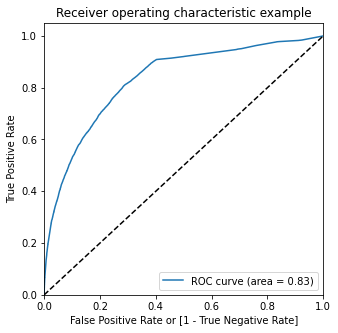

In [62]:
draw_roc(y_train_pred_final.Claimed, y_train_pred_final.Claim_Prob)

In [63]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Claim_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Claimed,Claim_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.553212,1,1,1,1,1,1,1,0,0,0,0
1,0,0.099181,0,1,0,0,0,0,0,0,0,0,0
2,0,0.098707,0,1,0,0,0,0,0,0,0,0,0
3,0,0.099681,0,1,0,0,0,0,0,0,0,0,0
4,0,0.474098,0,1,1,1,1,1,0,0,0,0,0


In [64]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Claimed, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.293782  1.000000  0.000000
0.1   0.1  0.628077  0.919095  0.507016
0.2   0.2  0.742852  0.804218  0.717324
0.3   0.3  0.772273  0.691032  0.806068
0.4   0.4  0.785848  0.607068  0.860219
0.5   0.5  0.790578  0.504911  0.909414
0.6   0.6  0.787267  0.421993  0.939218
0.7   0.7  0.776222  0.322009  0.965172
0.8   0.8  0.757255  0.209709  0.985031
0.9   0.9  0.729371  0.086540  0.996785


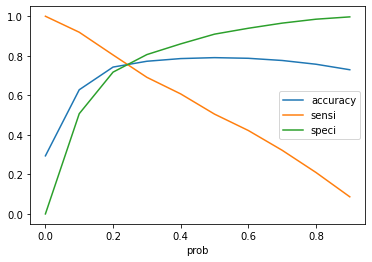

In [65]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [66]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Claim_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Claimed,Claim_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.553212,1,1,1,1,1,1,1,0,0,0,0,1
1,0,0.099181,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.098707,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.099681,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.474098,0,1,1,1,1,1,0,0,0,0,0,1


In [67]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Claimed, y_train_pred_final.final_predicted)

0.7722725445214389

### `Accuracy for train model after finding optimal cutoff point is 77.22%`

## Test set prediction

In [68]:
X_test[['Total_mons']] = scaler.transform(X_test[['Total_mons']])

In [69]:
X_train = X_train.drop('const', axis=1)

In [70]:
column = X_train.columns
X_test = X_test[column]
X_test

,BENE_SEX_IDENT_CD,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,Total_mons
23637,1,1,1,1,1,0,1,0,0,1,1,1,0.455009
30346,0,1,1,1,1,1,1,1,1,1,1,1,0.455009
18248,1,1,1,1,1,1,1,1,1,1,1,1,0.455009
6444,1,1,0,1,1,1,0,0,0,1,1,1,0.455009
53576,0,1,0,1,1,1,1,0,1,1,0,1,-0.474920
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37958,1,1,0,0,1,1,1,1,0,1,1,1,0.455009
27711,1,1,0,1,1,1,1,1,1,1,1,1,0.455009
22644,0,1,1,1,1,1,1,1,1,1,1,1,1.384939
18562,1,0,1,1,1,1,1,0,1,0,0,1,1.384939


In [71]:
X_test = sm.add_constant(X_test)

In [72]:
y_test_pred = res.predict(X_test)

In [73]:
y_test_pred[:10]

23637    0.475425
30346    0.099642
18248    0.099650
6444     0.520321
53576    0.318494
32774    0.188216
20401    0.099650
51940    0.098319
58281    0.098242
18420    0.845738
dtype: float64

In [74]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [75]:
# Let's see the head
y_pred_1.head()

,0
23637,0.475425
30346,0.099642
18248,0.099650
6444,0.520321
53576,0.318494


In [76]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [77]:
# Putting CustID to index
y_test_df['Claim_ID'] = y_test_df.index

In [78]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [79]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [80]:
y_pred_final.head()

,claimed,Claim_ID,0
0,1,23637,0.475425
1,0,30346,0.099642
2,0,18248,0.099650
3,1,6444,0.520321
4,1,53576,0.318494


In [81]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Claim_Prob'})

In [82]:
# Rearranging the columns
#y_pred_final = y_pred_final.reindex(['Claim ID','Claimed','Claim_Prob'], axis=1)

In [83]:
# Let's see the head of y_pred_final
y_pred_final.head()

,claimed,Claim_ID,Claim_Prob
0,1,23637,0.475425
1,0,30346,0.099642
2,0,18248,0.099650
3,1,6444,0.520321
4,1,53576,0.318494


In [84]:
y_pred_final['final_predicted'] = y_pred_final.Claim_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [85]:
y_pred_final.head()

,claimed,Claim_ID,Claim_Prob,final_predicted
0,1,23637,0.475425,1
1,0,30346,0.099642,0
2,0,18248,0.099650,0
3,1,6444,0.520321,1
4,1,53576,0.318494,1


In [86]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.claimed, y_pred_final.final_predicted)

0.7741419269396314

### `The overall accuracy of test model is 77.41%`

In [87]:
confusion2 = metrics.confusion_matrix(y_pred_final.claimed, y_pred_final.final_predicted )
confusion2

array([[10321,  2437],
       [ 1656,  3708]], dtype=int64)

In [88]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [89]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6912751677852349

In [90]:
# Let us calculate specificity
TN / float(TN+FP)

0.8089825991534724

In [91]:
y_pred_final.final_predicted.value_counts()

0    11977
1     6145
Name: final_predicted, dtype: int64

### From the test model we are able to find that
- `11,977` people would not claim the insurance
- `6,145` people would claim the insurance

# Decision Tree

In [92]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [94]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

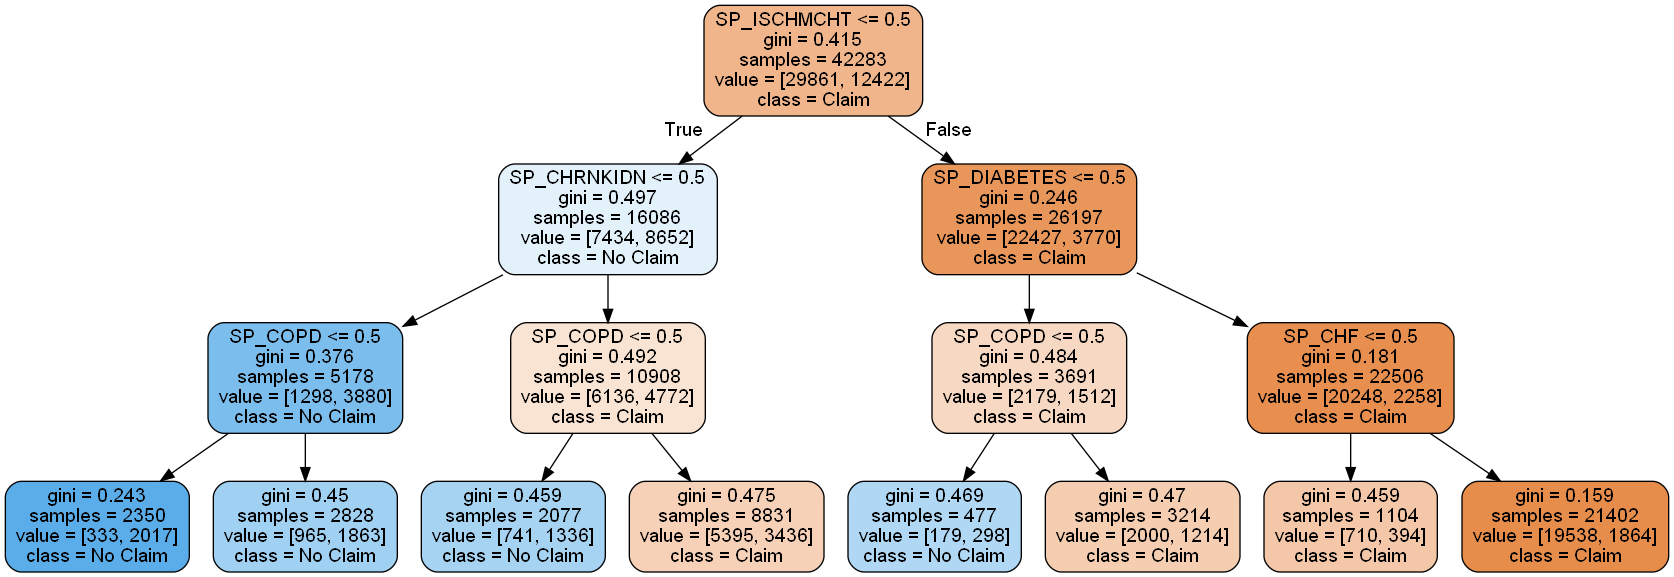

In [95]:
# plotting tree with max_depth=3
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['Claim', "No Claim"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
#Image(graph.create_png(),width=800,height=900)
#graph.write_pdf("dt_heartdisease.pdf")

### Model Performance

In [96]:
X_test = X_test.drop('const', axis=1)

In [97]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [98]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [99]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.7841685783884776


array([[27643,  2218],
       [ 6908,  5514]], dtype=int64)

In [100]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.7817569804657323


array([[11823,   935],
       [ 3020,  2344]], dtype=int64)

In [101]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns, 
                    class_names=['Claim', "No Claim"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [102]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

## Hyperparameter tuning

In [103]:
dt = DecisionTreeClassifier(random_state=42)

In [104]:
from sklearn.model_selection import GridSearchCV

In [105]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [106]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [107]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 20 candidates, totalling 80 fits
Wall time: 3.83 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2, 3],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [108]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.046868,0.011046,0.011717,0.006765,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.766815,0.764166,0.765774,0.772375,0.767282,0.003088,11
1,0.054675,0.007810,0.011715,0.006764,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.766815,0.764166,0.765774,0.772375,0.767282,0.003088,11
2,0.058582,0.006761,0.003906,0.006766,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.766815,0.764166,0.765774,0.772375,0.767282,0.003088,11
3,0.035144,0.006763,0.011717,0.006765,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.766815,0.764166,0.765774,0.772375,0.767282,0.003088,11
4,0.035149,0.006766,0.007813,0.007813,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.766815,0.764166,0.765774,0.772375,0.767282,0.003088,11


In [109]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
5,0.050771,0.006766,0.011715,0.006764,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.78318,0.784789,0.782707,0.785998,0.784169,0.001308,1
6,0.062484,0.000004,0.007811,0.007811,gini,3,10,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.78318,0.784789,0.782707,0.785998,0.784169,0.001308,1
7,0.060668,0.008181,0.012417,0.003242,gini,3,20,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.78318,0.784789,0.782707,0.785998,0.784169,0.001308,1
8,0.064471,0.006410,0.008117,0.007520,gini,3,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.78318,0.784789,0.782707,0.785998,0.784169,0.001308,1
9,0.046861,0.011048,0.007811,0.007811,gini,3,100,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.78318,0.784789,0.782707,0.785998,0.784169,0.001308,1


In [110]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [111]:
dt_best = grid_search.best_estimator_

In [112]:
evaluate_model(dt_best)

Train Accuracy : 0.7841685783884776
Train Confusion Matrix:
[[27643  2218]
 [ 6908  5514]]
--------------------------------------------------
Test Accuracy : 0.7817569804657323
Test Confusion Matrix:
[[11823   935]
 [ 3020  2344]]


In [113]:
from sklearn.metrics import classification_report

In [114]:
print(classification_report(y_test, dt_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86     12758
           1       0.71      0.44      0.54      5364

    accuracy                           0.78     18122
   macro avg       0.76      0.68      0.70     18122
weighted avg       0.77      0.78      0.76     18122



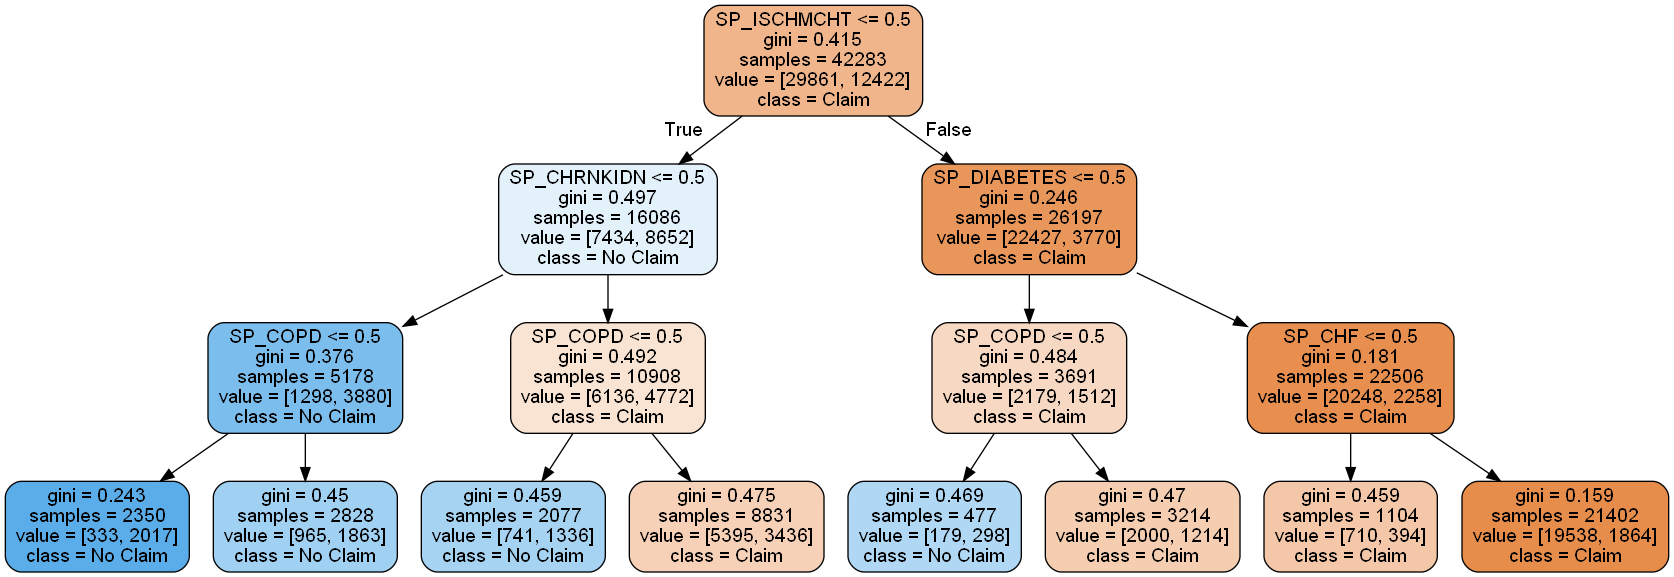

In [115]:
gph = get_dt_graph(dt_best)
Image(gph.create_png())

# Random Forest

In [116]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
rf = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=3)

In [118]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=42)

In [119]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=1608637542)

In [120]:
sample_tree = rf.estimators_[4]

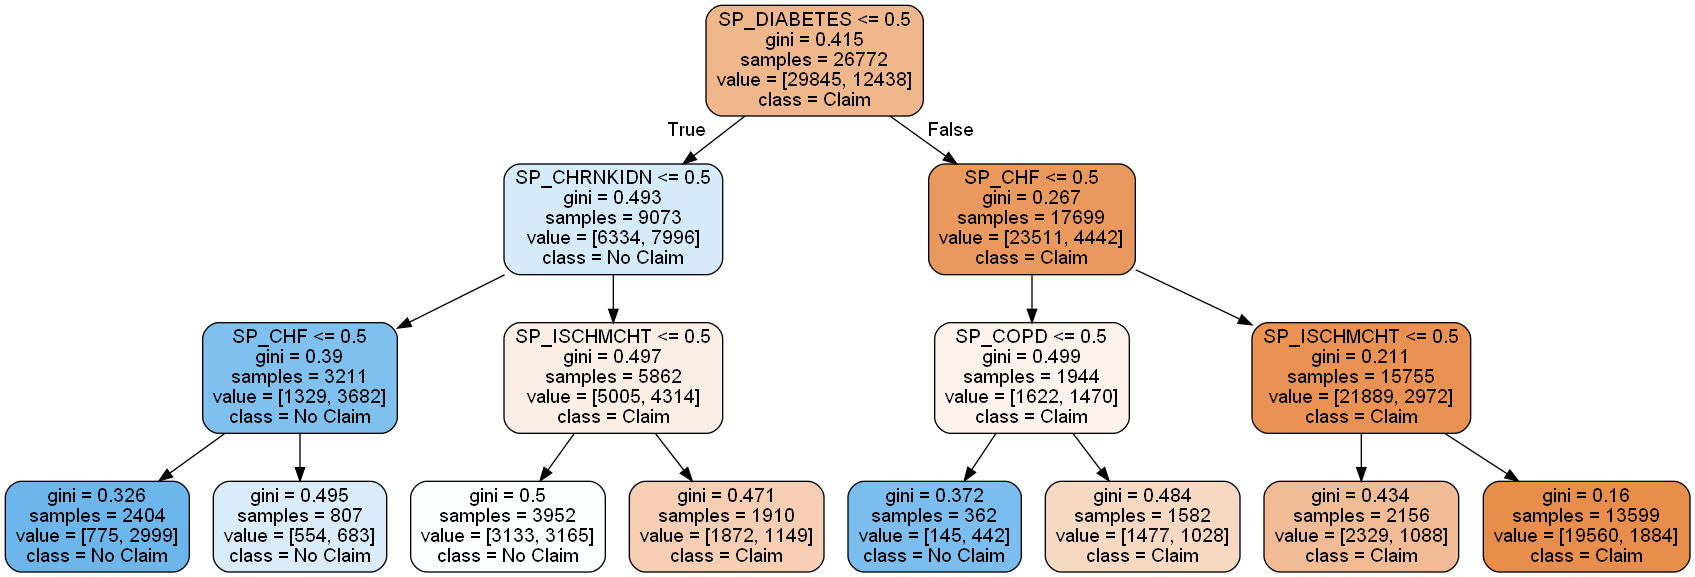

In [121]:
gph = get_dt_graph(sample_tree)
Image(gph.create_png(), width=700, height=700)

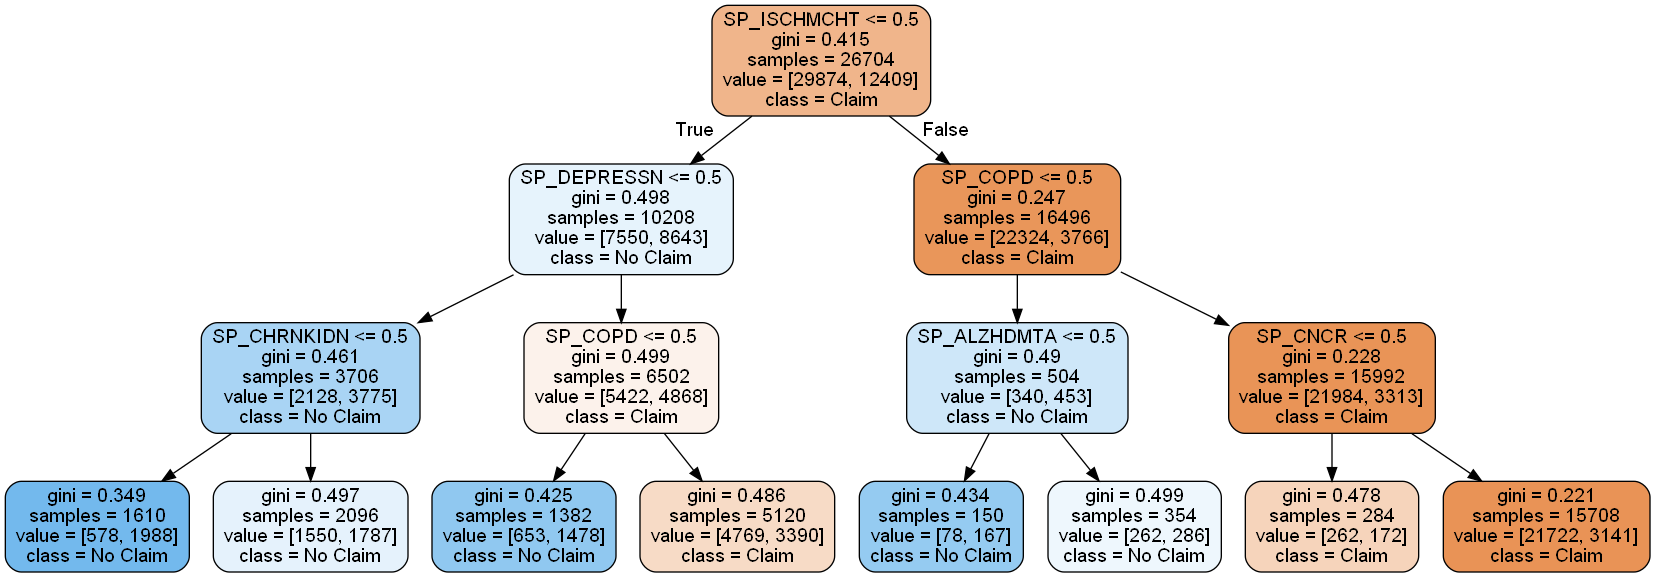

In [122]:
gph = get_dt_graph(rf.estimators_[2])
Image(gph.create_png(), width=700, height=700)

In [123]:
evaluate_model(rf)

Train Accuracy : 0.7873377007307901
Train Confusion Matrix:
[[27574  2287]
 [ 6705  5717]]
--------------------------------------------------
Test Accuracy : 0.7832468822425781
Test Confusion Matrix:
[[11757  1001]
 [ 2927  2437]]


### Grid search for Hyperparameter tuning

In [124]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [125]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200]
}

In [126]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [127]:
%%time
grid_search.fit(X,y)

Fitting 4 folds for each of 375 candidates, totalling 1500 fits
Wall time: 9min 42s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [128]:
rf_best = grid_search.best_estimator_

In [129]:
rf_best

RandomForestClassifier(max_depth=5, max_features=2, min_samples_leaf=20,
                       n_jobs=-1, random_state=42)

In [130]:
evaluate_model(rf_best)

Train Accuracy : 0.7905068230731027
Train Confusion Matrix:
[[27629  2232]
 [ 6626  5796]]
--------------------------------------------------
Test Accuracy : 0.7887650369716367
Test Confusion Matrix:
[[11802   956]
 [ 2872  2492]]


In [131]:
sample_tree = rf_best.estimators_[0]

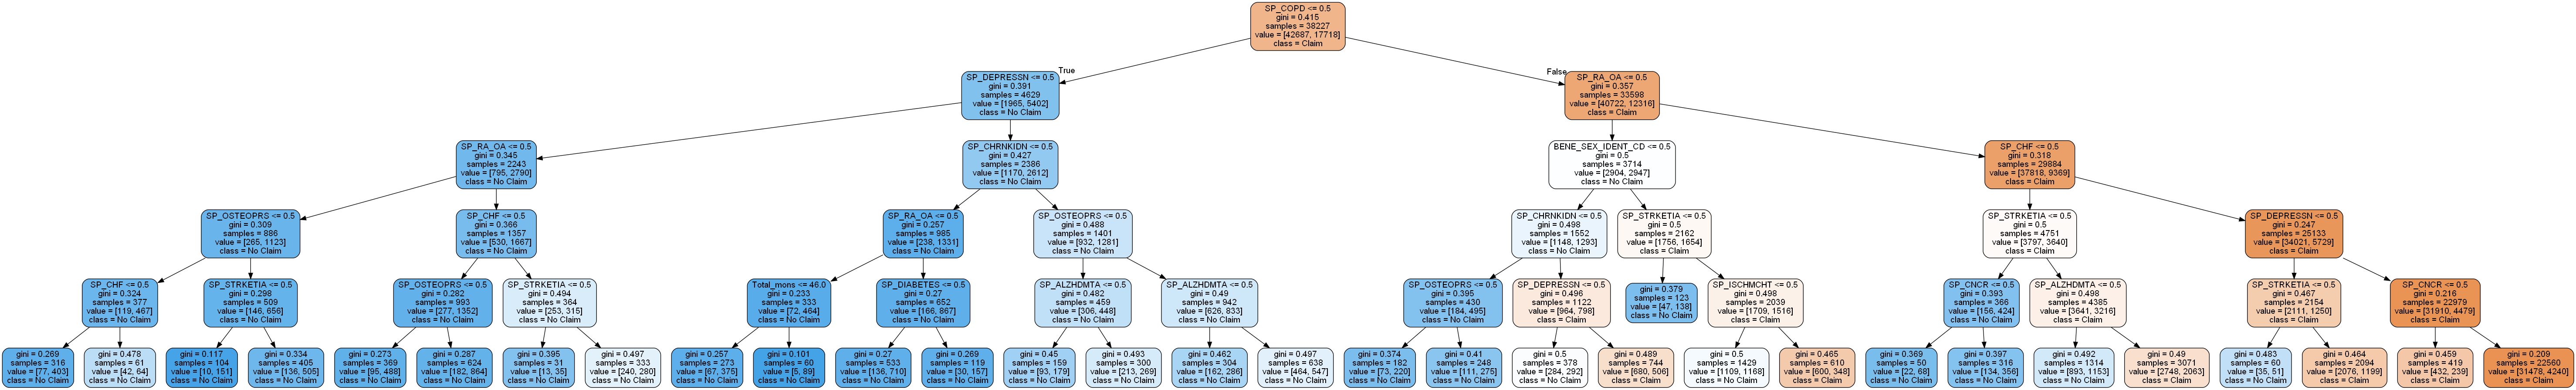

In [132]:
gph = get_dt_graph(sample_tree)
Image(gph.create_png())

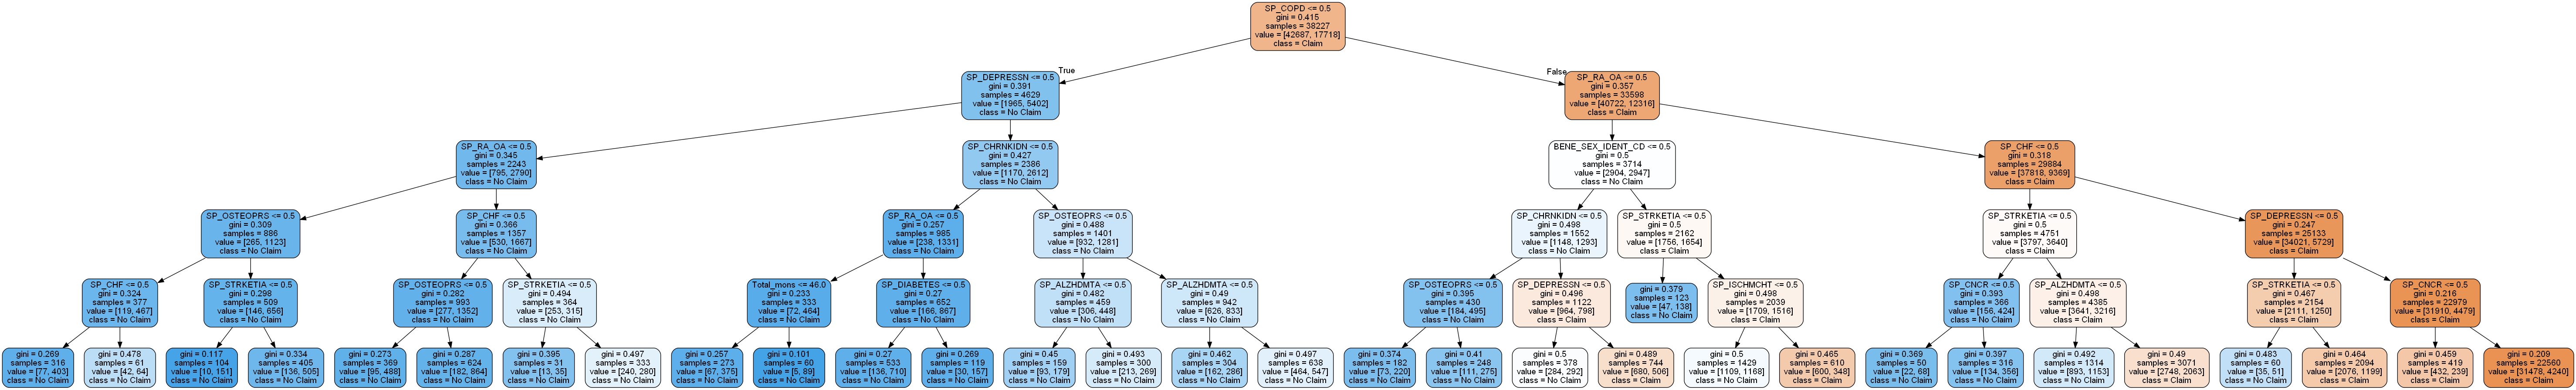

In [133]:
gph = get_dt_graph(rf_best.estimators_[0])
Image(gph.create_png(), height=600, width=600)

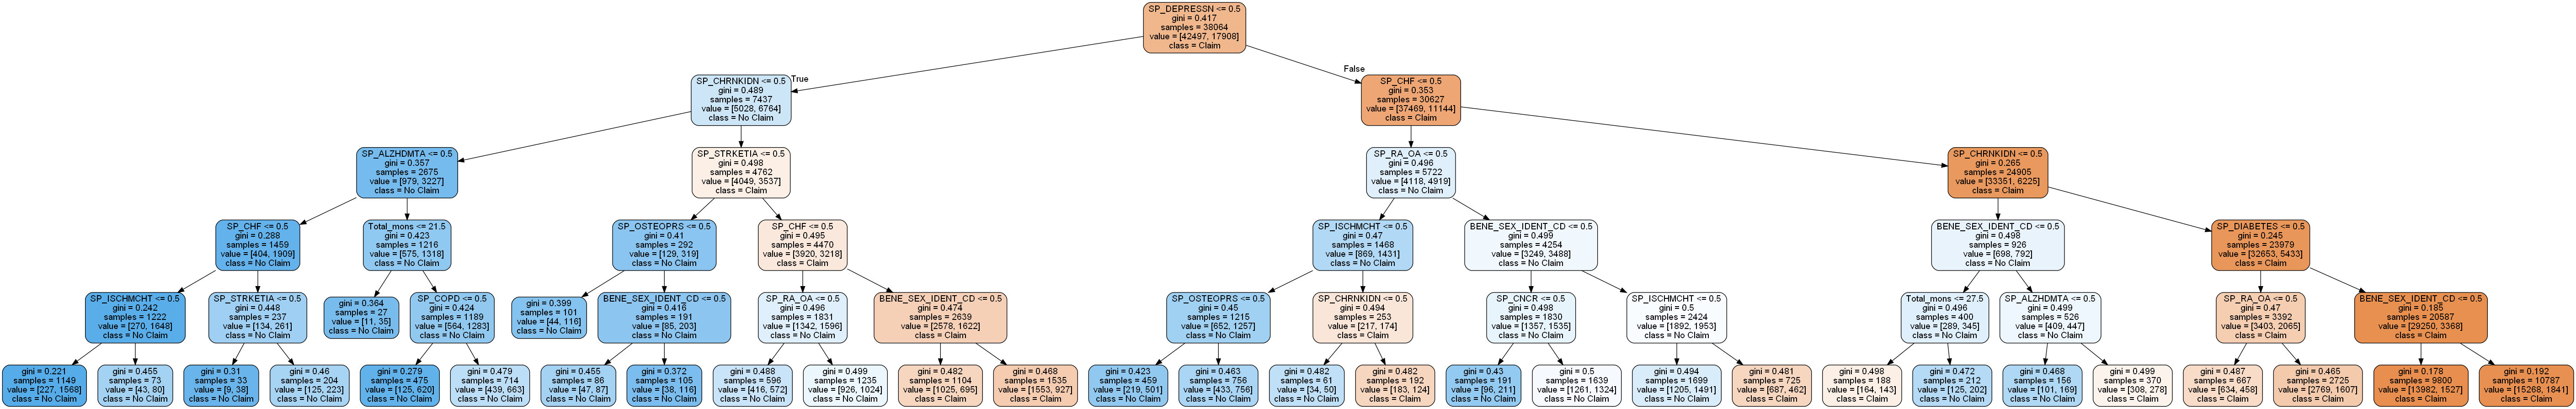

In [134]:
gph = get_dt_graph(rf_best.estimators_[10])
Image(gph.create_png(), height=600, width=600)

### Variable Importance

In [135]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)

In [136]:
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [137]:
classifier_rf.feature_importances_

array([0.00030342, 0.04700174, 0.17274694, 0.14210832, 0.00695929,
       0.12932852, 0.04188108, 0.20025795, 0.21301066, 0.0099785 ,
       0.01866176, 0.01523153, 0.0025303 ])

In [138]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": classifier_rf.feature_importances_
})

In [139]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
8,SP_ISCHMCHT,0.213011
7,SP_DIABETES,0.200258
2,SP_CHF,0.172747
3,SP_CHRNKIDN,0.142108
5,SP_COPD,0.129329
1,SP_ALZHDMTA,0.047002
6,SP_DEPRESSN,0.041881
10,SP_RA_OA,0.018662
11,SP_STRKETIA,0.015232
9,SP_OSTEOPRS,0.009979


- The most important variable which affects whether a patient would claim insurance or not is <b>SP_ISCHMCHT</b> and its importance is <b>0.213011</b> which means that a person having ischemic heart disease is more likely to claim insurance
- The next disease influencing claim is <b>SP_DIABETES</b> which has imp of <b>0.200258</b>

In [143]:
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test,y_test_pred))

0.7841685783884776
0.7817569804657323


### XGBoost

In [145]:
import xgboost as xgb
from sklearn import metrics

xgclf = xgb.XGBClassifier()

xgclf.fit(X_train, y_train)

E:\Softwares\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:03:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [146]:
from sklearn import model_selection

In [147]:
xgb_model = xgb.XGBClassifier()

# Default-Run of default-hyperparameters
parameters = {'learning_rate': [0.3],
              'max_depth': [6],
              'min_child_weight': [1],
              'n_estimators': [100]}

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=3,
                                       scoring=scorer,
                                       refit=True)

clf_xgb.fit(X_train, y_train)

E:\Softwares\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:07:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight